# Titanic
In this task it is proposed to solve the problem of predicting the surviving passengers of the Titanic.
Information about the dataset is available at the <a href=https://www.kaggle.com/c/titanic> link </a>.

In [417]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from scipy import stats
%matplotlib inline


The first file contains information about passengers, the second contains information about whether the passenger survived or not.


In [418]:
data = pd.read_csv('titanic_data.csv', index_col='PassengerId')
print(f'Total {len(data)} passengers in the sample')
data

Total 891 passengers in the sample


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [419]:
y = pd.read_csv('titanic_surv.csv')
y.index = data.index
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [420]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Exploring the data

### Survivor analytics by gender

Surviving men 109 out of 577    proportion: 0.18890814558058924
Surviving women 233 out of 314    proportion: 0.7420382165605095


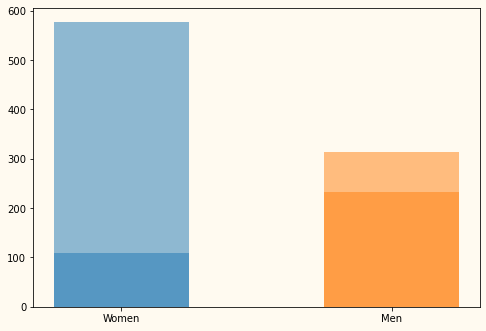

In [421]:
count_male = data['Sex'].value_counts()['male']
count_female = data['Sex'].value_counts()['female']

count_male_surv = data[data['Survived'] == 1]['Sex'].value_counts()['male']
count_female_surv = data[data['Survived'] == 1]['Sex'].value_counts()['female']
print('Surviving men', count_male_surv, 'out of', count_male, '  ', 'proportion:', count_male_surv / count_male)
print('Surviving women', count_female_surv, 'out of', count_female, '  ', 'proportion:', count_female_surv / count_female)

fig, ax = plt.subplots()

ax.bar('Women', [count_male_surv,count_male], alpha=0.5, width = 0.5)
ax.bar('Men', [count_female, count_female_surv], alpha=0.5, width = 0.5)

fig.set_figwidth(8)    #  width Figure
fig.set_figheight(5.5)    #  height Figure
fig.set(facecolor='floralwhite')
ax.set(facecolor='floralwhite')

plt.show()


### Survivors analytics by class

First class survivors 136 out of 216    proportion 0.6296296296296297
Second class survivors 87 out of 184    proportion 0.47282608695652173
Third class survivors 119 out of 491    proportion 0.24236252545824846


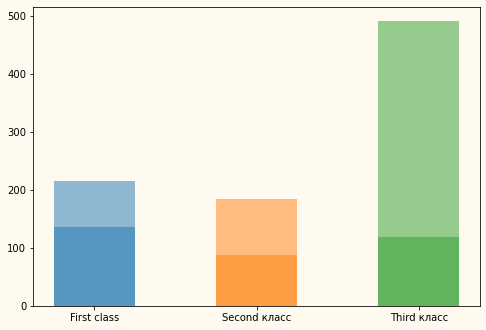

In [422]:
count_class_one = data['Pclass'].value_counts()[1]
count_class_two = data['Pclass'].value_counts()[2]
count_class_three = data['Pclass'].value_counts()[3]

count_class_one_surv = data[data['Survived'] == 1]['Pclass'].value_counts()[1]
count_class_two_surv = data[data['Survived'] == 1]['Pclass'].value_counts()[2]
count_class_three_surv = data[data['Survived'] == 1]['Pclass'].value_counts()[3]

print('First class survivors', count_class_one_surv, 'out of', count_class_one, '  ', 'proportion', count_class_one_surv / count_class_one)
print('Second class survivors', count_class_two_surv, 'out of', count_class_two,  '  ', 'proportion', count_class_two_surv / count_class_two)
print('Third class survivors', count_class_three_surv, 'out of', count_class_three,  '  ', 'proportion', count_class_three_surv / count_class_three)



fig, ax = plt.subplots()

ax.bar('First class', [count_class_one_surv, count_class_one], alpha=0.5, width = 0.5)
ax.bar('Second класс', [count_class_two_surv, count_class_two], alpha=0.5, width = 0.5)
ax.bar('Third класс', [count_class_three_surv, count_class_three], alpha=0.5, width = 0.5)

fig.set_figwidth(8)   
fig.set_figheight(5.5)
fig.set(facecolor='floralwhite')
ax.set(facecolor='floralwhite')

plt.show()

### Survivors analytics by age

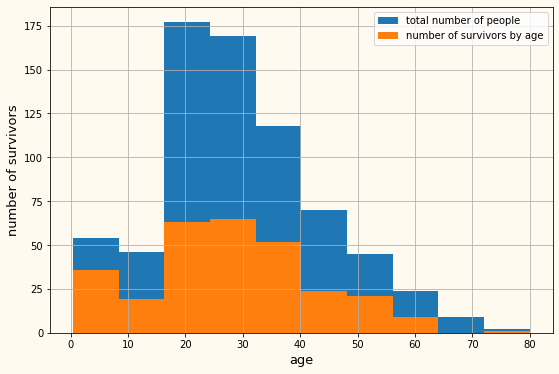

In [423]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))

data['Age'].hist(label='total number of people')
data[data['Survived'] == 1]['Age'].hist(label='number of survivors by age')

fig.set_figwidth(9)    
fig.set_figheight(6)    
fig.set(facecolor='floralwhite')
ax.set(facecolor='floralwhite')

plt.xlabel('age', fontsize=13)
plt.ylabel('number of survivors', fontsize=13)

plt.legend()
plt.show()

### Survivors analytics by the number of people in the family on the ship

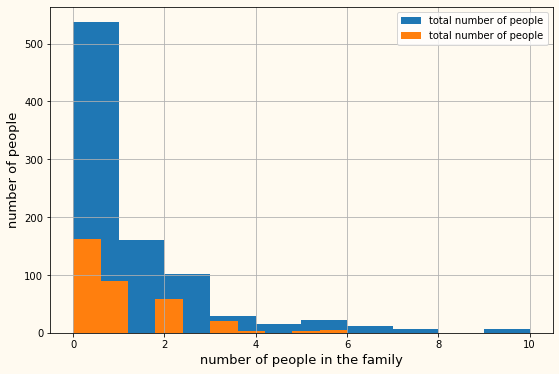

In [424]:
data['Family'] = data['SibSp'] + data['Parch']

fig, ax = plt.subplots()

x = {i: data[data['Family'] == i]['Survived'].count() for i in range(data['Family'].max() + 1)}

data['Family'].hist(label='total number of people')
data[data['Survived'] == 1]['Family'].hist(label='total number of people')

fig.set_figwidth(9)
fig.set_figheight(6)
fig.set(facecolor='floralwhite')
ax.set(facecolor='floralwhite')

plt.xlabel('number of people in the family', fontsize=13)
plt.ylabel('number of people', fontsize=13)

plt.legend()
plt.show()

### Survivors analytics by "Embarked"

In [425]:
data['Embarked'].isna().sum()

2

In [426]:
data.loc[:, ['Embarked']] = data.loc[:, ['Embarked']].fillna('0')
data['Embarked'].isna().sum()

0

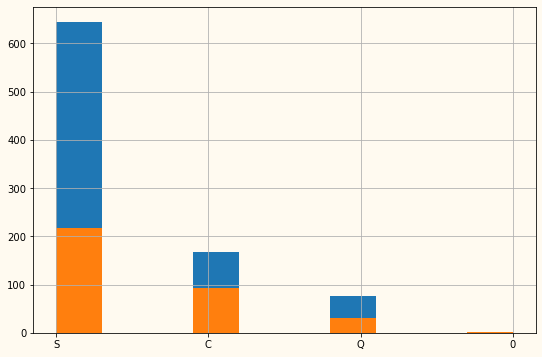

number of survivors, embarked S 217 out of 644    proportion: 0.33695652173913043
number of survivors, embarked C 93 out of 168    proportion: 0.5535714285714286
number of survivors, embarked Q 30 out of 77    proportion: 0.38961038961038963


In [427]:
fig, ax = plt.subplots()

data['Embarked'].hist()
data[data['Survived'] == 1]['Embarked'].hist()

fig.set_figwidth(9)
fig.set_figheight(6)
fig.set(facecolor='floralwhite')
ax.set(facecolor='floralwhite')

plt.show()

count_surv_embarked = data.drop(data[data.Survived == 0].index).groupby(['Embarked']).size()
count_embarked = data.groupby(['Embarked']).size()

print('number of survivors, embarked S', count_surv_embarked[3], 'out of', count_embarked[3], '  ', 'proportion:', count_surv_embarked[3] / count_embarked[3])
print('number of survivors, embarked C', count_surv_embarked[1], 'out of', count_embarked[1], '  ', 'proportion:', count_surv_embarked[1] / count_embarked[1])
print('number of survivors, embarked Q', count_surv_embarked[2], 'out of', count_embarked[2], '  ', 'proportion:', count_surv_embarked[2] / count_embarked[2])


### Looking for NaN in the data

In [428]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin']

In [429]:
print('Nan in the в Age:', data['Age'].isna().sum())
print('Nan in the в Cabin:', data['Cabin'].isna().sum())

Nan in the в Age: 177
Nan in the в Cabin: 687


# Fill in the NaN in the "age" column. Solve the regression problem

In [430]:
data.loc[:, ['Cabin']] = data.loc[:, ['Cabin']].fillna('0')
data['Cabin'].isna().sum()

0

In [431]:
data['Cabin']

PassengerId
1         0
2       C85
3         0
4      C123
5         0
       ... 
887       0
888     B42
889       0
890    C148
891       0
Name: Cabin, Length: 891, dtype: object

In [432]:
def get_cabin_letter(row):
    return 'Cabin_type_' + row['Cabin'][0]

data['Cabin_type'] = data.apply(get_cabin_letter, axis=1)
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Family,Cabin_type
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,1,Cabin_type_0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,Cabin_type_C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,Cabin_type_0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,Cabin_type_C
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0,Cabin_type_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,0,Cabin_type_0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,Cabin_type_B
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S,0,3,Cabin_type_0


## Adding new features

In [433]:
data = pd.concat([data, pd.get_dummies(data['Sex'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['Embarked'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['Cabin_type'])], axis=1)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,S,Cabin_type_0,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,...,1,1,0,0,0,0,0,0,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,...,0,0,0,0,1,0,0,0,0,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,...,1,1,0,0,0,0,0,0,0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,...,1,0,0,0,1,0,0,0,0,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,...,1,1,0,0,0,0,0,0,0,0


In [434]:
# deleting categorical data
data.drop(['Name', 'Sex','Ticket', 'Cabin', 'Embarked', 'Cabin_type', '0'], axis=1, inplace=True)
data

,Pclass,Age,SibSp,Parch,Fare,Survived,Family,female,male,C,...,S,Cabin_type_0,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0
2,1,38.0,1,0,71.2833,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,3,26.0,0,0,7.9250,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
4,1,35.0,1,0,53.1000,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
5,3,35.0,0,0,8.0500,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
888,1,19.0,0,0,30.0000,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
889,3,NaN,1,2,23.4500,0,3,1,0,0,...,1,1,0,0,0,0,0,0,0,0


In [435]:
# delete lines, where age is NaN
data_age = data.dropna(axis=0, how='any', subset=['Age']).reset_index().drop('PassengerId', axis=1)
data_age

,Pclass,Age,SibSp,Parch,Fare,Survived,Family,female,male,C,...,S,Cabin_type_0,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T
0,3,22.0,1,0,7.2500,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,3,35.0,0,0,8.0500,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,3,39.0,0,5,29.1250,0,5,1,0,0,...,0,1,0,0,0,0,0,0,0,0
710,2,27.0,0,0,13.0000,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
711,1,19.0,0,0,30.0000,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
712,1,26.0,0,0,30.0000,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [436]:
# delete lines, where age is int/float
data_age = data.dropna(axis=0, how='any', subset=['Age']).reset_index().drop('PassengerId', axis=1)
data_age
data_nan_age = data.drop(data[data.Age >0].index).reset_index().drop('PassengerId', axis=1)
data_nan_age

,Pclass,Age,SibSp,Parch,Fare,Survived,Family,female,male,C,...,S,Cabin_type_0,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T
0,3,NaN,0,0,8.4583,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2,NaN,0,0,13.0000,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
2,3,NaN,0,0,7.2250,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,3,NaN,0,0,7.2250,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,3,NaN,0,0,7.8792,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,NaN,0,0,7.2292,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
173,3,NaN,8,2,69.5500,0,10,1,0,0,...,1,1,0,0,0,0,0,0,0,0
174,3,NaN,0,0,9.5000,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
175,3,NaN,0,0,7.8958,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0


In [437]:
data_age_train, data_age_test = train_test_split(data_age, random_state=42, test_size=0.2)

X_data_age_train = data_age_train.drop('Age', axis=1)
y_data_age_train = data_age_train['Age']
X_data_age_test = data_age_test.drop('Age', axis=1)
y_data_age_test = data_age_test['Age']

X_data_nan_age = data_nan_age.drop('Age', axis=1)

### Random forest alghorithm

In [438]:
model_RF_age = RandomForestRegressor(random_state=42,
                               # число деревьев в лесу
                               n_estimators=200,
                               criterion='mae',
                               max_depth=10,
                               # Вычислять out-of-bag ошибку
                               oob_score=True,
                               warm_start=False
                              )

# обучаем модель на тренировочных данных
model_RF_age.fit(X_data_age_train, y_data_age_train)

y_age_pred = model_RF_age.predict(X_data_age_test)
mean_absolute_error(y_age_pred, y_data_age_test)

9.4103006993007

### GradientBoostingRegressor alghorithm

In [439]:
model_GB_age = GradientBoostingRegressor(random_state=42,
                                  learning_rate=0.1,
                                  n_estimators=500,
                                  criterion='mae',
                                  max_depth=1,
                                  max_features='auto'
)

# обучаем модель на тренировочных данных
model_GB_age.fit(X_data_age_train, y_data_age_train)

y_age_pred = model_GB_age.predict(X_data_age_test)
mean_absolute_error(y_age_pred, y_data_age_test)

9.227447325455945

### Keras

In [440]:
# import from keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [441]:
#  Converting pandas dataframe to numpy array
X_data_age_train = X_data_age_train.values
y_data_age_train = y_data_age_train.values
X_data_age_test = X_data_age_test.values
y_data_age_test = y_data_age_test.values

In [442]:
# Creating a model
model_NN_age = Sequential()
model_NN_age.add(Dense(7, input_dim=20, activation='relu'))
model_NN_age.add(Dense(5, activation='relu'))
model_NN_age.add(Dense(1, activation='linear'))

# Compiling model
model_NN_age.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mean_absolute_error'])

# Training a model
model_NN_age.fit(X_data_age_train, y_data_age_train, epochs=500, batch_size=20)


Epoch 1/500
29/29 [==============================] - 1s 820us/step - loss: 1321.3221 - mean_absolute_error: 33.1305
Epoch 2/500
29/29 [==============================] - 0s 819us/step - loss: 1180.8242 - mean_absolute_error: 31.0526
Epoch 3/500
29/29 [==============================] - 0s 1ms/step - loss: 1176.1675 - mean_absolute_error: 30.8019
Epoch 4/500
29/29 [==============================] - 0s 890us/step - loss: 1119.4383 - mean_absolute_error: 30.0225
Epoch 5/500
29/29 [==============================] - 0s 1ms/step - loss: 1020.9517 - mean_absolute_error: 28.4738
Epoch 6/500
29/29 [==============================] - 0s 1ms/step - loss: 984.3843 - mean_absolute_error: 28.0379
Epoch 7/500
29/29 [==============================] - 0s 1ms/step - loss: 1031.6023 - mean_absolute_error: 28.4482
Epoch 8/500
29/29 [==============================] - 0s 962us/step - loss: 911.0568 - mean_absolute_error: 26.4791
Epoch 9/500
29/29 [==============================] - 0s 784us/step - loss: 821.384

29/29 [==============================] - 0s 819us/step - loss: 200.1700 - mean_absolute_error: 11.3589
Epoch 72/500
29/29 [==============================] - 0s 855us/step - loss: 207.9068 - mean_absolute_error: 11.3696
Epoch 73/500
29/29 [==============================] - 0s 783us/step - loss: 185.5390 - mean_absolute_error: 10.7622
Epoch 74/500
29/29 [==============================] - 0s 855us/step - loss: 195.2282 - mean_absolute_error: 11.2239
Epoch 75/500
29/29 [==============================] - 0s 855us/step - loss: 198.9314 - mean_absolute_error: 11.2134
Epoch 76/500
29/29 [==============================] - 0s 784us/step - loss: 191.0908 - mean_absolute_error: 10.8142
Epoch 77/500
29/29 [==============================] - 0s 855us/step - loss: 212.2332 - mean_absolute_error: 11.5801
Epoch 78/500
29/29 [==============================] - 0s 819us/step - loss: 208.3151 - mean_absolute_error: 11.5292
Epoch 79/500
29/29 [==============================] - 0s 890us/step - loss: 190.4801 

29/29 [==============================] - 0s 926us/step - loss: 176.3889 - mean_absolute_error: 10.4378
Epoch 142/500
29/29 [==============================] - 0s 962us/step - loss: 185.6950 - mean_absolute_error: 10.8780
Epoch 143/500
29/29 [==============================] - 0s 819us/step - loss: 162.6853 - mean_absolute_error: 10.0184
Epoch 144/500
29/29 [==============================] - 0s 962us/step - loss: 178.1150 - mean_absolute_error: 10.5377
Epoch 145/500
29/29 [==============================] - 0s 820us/step - loss: 174.6205 - mean_absolute_error: 10.6334
Epoch 146/500
29/29 [==============================] - 0s 856us/step - loss: 165.5523 - mean_absolute_error: 10.2783
Epoch 147/500
29/29 [==============================] - 0s 926us/step - loss: 165.7217 - mean_absolute_error: 10.1510
Epoch 148/500
29/29 [==============================] - ETA: 0s - loss: 117.5761 - mean_absolute_error: 9.634 - 0s 1ms/step - loss: 152.6315 - mean_absolute_error: 9.9036
Epoch 149/500
29/29 [====

29/29 [==============================] - 0s 855us/step - loss: 148.0331 - mean_absolute_error: 9.5567
Epoch 212/500
29/29 [==============================] - 0s 748us/step - loss: 170.1807 - mean_absolute_error: 10.4019
Epoch 213/500
29/29 [==============================] - 0s 784us/step - loss: 145.1416 - mean_absolute_error: 9.7148
Epoch 214/500
29/29 [==============================] - 0s 748us/step - loss: 155.5806 - mean_absolute_error: 9.8187
Epoch 215/500
29/29 [==============================] - 0s 819us/step - loss: 165.1833 - mean_absolute_error: 9.9574
Epoch 216/500
29/29 [==============================] - 0s 866us/step - loss: 161.7033 - mean_absolute_error: 10.0837
Epoch 217/500
29/29 [==============================] - 0s 783us/step - loss: 167.9892 - mean_absolute_error: 10.2072
Epoch 218/500
29/29 [==============================] - 0s 928us/step - loss: 152.9695 - mean_absolute_error: 9.7866
Epoch 219/500
29/29 [==============================] - 0s 1ms/step - loss: 163.7051

29/29 [==============================] - 0s 1ms/step - loss: 165.3155 - mean_absolute_error: 9.9205
Epoch 283/500
29/29 [==============================] - 0s 926us/step - loss: 155.8824 - mean_absolute_error: 9.8738
Epoch 284/500
29/29 [==============================] - 0s 1ms/step - loss: 141.2642 - mean_absolute_error: 9.2389
Epoch 285/500
29/29 [==============================] - 0s 1ms/step - loss: 136.5696 - mean_absolute_error: 9.3602
Epoch 286/500
29/29 [==============================] - 0s 1ms/step - loss: 163.2201 - mean_absolute_error: 10.0091
Epoch 287/500
29/29 [==============================] - 0s 1ms/step - loss: 153.2806 - mean_absolute_error: 9.6990
Epoch 288/500
29/29 [==============================] - 0s 1ms/step - loss: 137.4412 - mean_absolute_error: 9.1744
Epoch 289/500
29/29 [==============================] - 0s 1ms/step - loss: 159.9417 - mean_absolute_error: 9.8770
Epoch 290/500
29/29 [==============================] - 0s 1ms/step - loss: 142.9637 - mean_absolute

29/29 [==============================] - 0s 1ms/step - loss: 154.5287 - mean_absolute_error: 9.7702
Epoch 354/500
29/29 [==============================] - 0s 1ms/step - loss: 136.3015 - mean_absolute_error: 9.1878
Epoch 355/500
29/29 [==============================] - 0s 1ms/step - loss: 135.7360 - mean_absolute_error: 9.1209
Epoch 356/500
29/29 [==============================] - 0s 1ms/step - loss: 144.5361 - mean_absolute_error: 9.6475
Epoch 357/500
29/29 [==============================] - 0s 1ms/step - loss: 146.9660 - mean_absolute_error: 9.6072
Epoch 358/500
29/29 [==============================] - 0s 997us/step - loss: 162.6468 - mean_absolute_error: 9.9010
Epoch 359/500
29/29 [==============================] - 0s 748us/step - loss: 130.3082 - mean_absolute_error: 8.7850
Epoch 360/500
29/29 [==============================] - 0s 784us/step - loss: 142.3462 - mean_absolute_error: 9.6501
Epoch 361/500
29/29 [==============================] - 0s 714us/step - loss: 146.7010 - mean_abs

Epoch 424/500
29/29 [==============================] - 0s 890us/step - loss: 138.1410 - mean_absolute_error: 9.4433
Epoch 425/500
29/29 [==============================] - 0s 890us/step - loss: 138.4592 - mean_absolute_error: 9.1954
Epoch 426/500
29/29 [==============================] - 0s 926us/step - loss: 152.2713 - mean_absolute_error: 9.7796
Epoch 427/500
29/29 [==============================] - 0s 907us/step - loss: 150.8662 - mean_absolute_error: 9.5942
Epoch 428/500
29/29 [==============================] - 0s 1ms/step - loss: 150.9081 - mean_absolute_error: 9.5455
Epoch 429/500
29/29 [==============================] - 0s 923us/step - loss: 144.4693 - mean_absolute_error: 9.5000
Epoch 430/500
29/29 [==============================] - 0s 819us/step - loss: 137.1307 - mean_absolute_error: 9.0945
Epoch 431/500
29/29 [==============================] - 0s 890us/step - loss: 143.0644 - mean_absolute_error: 9.4556
Epoch 432/500
29/29 [==============================] - 0s 855us/step - los

29/29 [==============================] - 0s 926us/step - loss: 139.5450 - mean_absolute_error: 9.2265
Epoch 495/500
29/29 [==============================] - 0s 892us/step - loss: 161.0399 - mean_absolute_error: 9.9259
Epoch 496/500
29/29 [==============================] - 0s 997us/step - loss: 153.0579 - mean_absolute_error: 9.7934
Epoch 497/500
29/29 [==============================] - 0s 926us/step - loss: 143.7382 - mean_absolute_error: 9.1734
Epoch 498/500
29/29 [==============================] - 0s 926us/step - loss: 154.2781 - mean_absolute_error: 9.7476
Epoch 499/500
29/29 [==============================] - 0s 1ms/step - loss: 148.0995 - mean_absolute_error: 9.6818
Epoch 500/500
29/29 [==============================] - 0s 890us/step - loss: 141.1665 - mean_absolute_error: 9.3473


### Algorithms predict almost the same. Use a random forest to fill data.

In [443]:
print('RF, mae:', mean_absolute_error(model_RF_age.predict(X_data_age_test), y_data_age_test))
print('GB, mae:', mean_absolute_error(model_GB_age.predict(X_data_age_test), y_data_age_test))
print('NN, mae:', mean_absolute_error(model_NN_age.predict(X_data_age_test), y_data_age_test))

RF, mae: 9.4103006993007
GB, mae: 9.227447325455945
NN, mae: 10.145205277663012


### Make a complete dataset

In [444]:
data_nan_age['Age'] = pd.DataFrame(model_RF_age.predict(X_data_nan_age))
data_nan_age

,Pclass,Age,SibSp,Parch,Fare,Survived,Family,female,male,C,...,S,Cabin_type_0,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T
0,3,35.17045,0,0,8.4583,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2,33.21625,0,0,13.0000,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
2,3,16.05000,0,0,7.2250,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,3,31.84000,0,0,7.2250,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,3,20.05250,0,0,7.8792,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,27.02625,0,0,7.2292,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
173,3,8.48750,8,2,69.5500,0,10,1,0,0,...,1,1,0,0,0,0,0,0,0,0
174,3,26.22125,0,0,9.5000,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
175,3,26.72875,0,0,7.8958,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0


In [445]:
data = pd.concat([data_age, data_nan_age]).reset_index().drop('index', axis=1)
data

,Pclass,Age,SibSp,Parch,Fare,Survived,Family,female,male,C,...,S,Cabin_type_0,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T
0,3,22.00000,1,0,7.2500,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0
1,1,38.00000,1,0,71.2833,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,3,26.00000,0,0,7.9250,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
3,1,35.00000,1,0,53.1000,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,3,35.00000,0,0,8.0500,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,3,27.02625,0,0,7.2292,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
887,3,8.48750,8,2,69.5500,0,10,1,0,0,...,1,1,0,0,0,0,0,0,0,0
888,3,26.22125,0,0,9.5000,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
889,3,26.72875,0,0,7.8958,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0


# Train the model for recognition 'Survived'

In [446]:
data_train, data_test = train_test_split(data, random_state=42, test_size=0.3)

X_data_train = data_age_train.drop('Survived', axis=1)
y_data_train = data_age_train['Survived']
X_data_test = data_age_test.drop('Survived', axis=1)
y_data_test = data_age_test['Survived']

### Random forest

In [447]:
model_RF = RandomForestClassifier(random_state=42,
                               # число деревьев в лесу
                               n_estimators=500,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               max_depth=5,
                               # Вычислять out-of-bag ошибку
                               oob_score=True,
                               # использовать результаты предыдущего вызова и нарастить предыдущий лес 
                               warm_start=False,
                               # веса классов для балансировки обучения
                               class_weight=None
                              )
# обучаем модель на тренировочных данных
model_RF.fit(X_data_train, y_data_train)

y_pred = model_RF.predict(X_data_test)
accuracy_score(y_pred, y_data_test)

0.8111888111888111

### Gradient boosting

In [448]:
model_GB = GradientBoostingClassifier(n_estimators=500, 
                                    learning_rate=1.0,
                                    max_depth=1, 
                                    random_state=42)
model_GB.fit(X_data_train, y_data_train)

y_pred = model_GB.predict(X_data_test)
accuracy_score(y_pred, y_data_test)

0.7902097902097902

### NN

In [449]:
#  Converting pandas dataframe to numpy array
X_data_train = X_data_train.values
y_data_train = y_data_train.values
X_data_test = X_data_test.values
y_data_test = y_data_test.values

In [450]:
y_data_train_bin = np_utils.to_categorical(y_data_train)
y_data_test_bin = np_utils.to_categorical(y_data_test)
y_data_test_bin[0:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [451]:
# Creating a model
model_NN = Sequential()
model_NN.add(Dense(17, input_dim=20, activation='relu'))
model_NN.add(Dense(15, activation='relu'))
model_NN.add(Dense(10, activation='relu'))
model_NN.add(Dense(7, activation='relu'))
model_NN.add(Dense(2, activation='softmax'))

# Compiling model
model_NN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training a model
model_NN.fit(X_data_train, y_data_train_bin, epochs=500, batch_size=20)

Epoch 1/500
29/29 [==============================] - 1s 2ms/step - loss: 0.6486 - accuracy: 0.6812
Epoch 2/500
29/29 [==============================] - 0s 3ms/step - loss: 0.6100 - accuracy: 0.6983
Epoch 3/500
29/29 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.7144
Epoch 4/500
29/29 [==============================] - 0s 4ms/step - loss: 0.5981 - accuracy: 0.7067
Epoch 5/500
29/29 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.6719
Epoch 6/500
29/29 [==============================] - 0s 1ms/step - loss: 0.5725 - accuracy: 0.7408
Epoch 7/500
29/29 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.6995
Epoch 8/500
29/29 [==============================] - 0s 1ms/step - loss: 0.5814 - accuracy: 0.7202
Epoch 9/500
29/29 [==============================] - 0s 1ms/step - loss: 0.5756 - accuracy: 0.7228
Epoch 10/500
29/29 [==============================] - 0s 1ms/step - loss: 0.5776 - accuracy: 0.6889
Epoch 11/

29/29 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8187
Epoch 83/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8004
Epoch 84/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8197
Epoch 85/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8264
Epoch 86/500
29/29 [==============================] - 0s 962us/step - loss: 0.4140 - accuracy: 0.8070
Epoch 87/500
29/29 [==============================] - 0s 945us/step - loss: 0.3932 - accuracy: 0.8270
Epoch 88/500
29/29 [==============================] - 0s 921us/step - loss: 0.3867 - accuracy: 0.8356
Epoch 89/500
29/29 [==============================] - 0s 998us/step - loss: 0.3939 - accuracy: 0.8298
Epoch 90/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4205 - accuracy: 0.7976
Epoch 91/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8282
Epoch

29/29 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8183
Epoch 163/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8401
Epoch 164/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8399
Epoch 165/500
29/29 [==============================] - 0s 1000us/step - loss: 0.3539 - accuracy: 0.8433
Epoch 166/500
29/29 [==============================] - 0s 997us/step - loss: 0.3422 - accuracy: 0.8490
Epoch 167/500
29/29 [==============================] - 0s 997us/step - loss: 0.3919 - accuracy: 0.8188
Epoch 168/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8337
Epoch 169/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8257
Epoch 170/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3534 - accuracy: 0.8429
Epoch 171/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.82

29/29 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.8503
Epoch 243/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3444 - accuracy: 0.8446
Epoch 244/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8405
Epoch 245/500
29/29 [==============================] - 0s 966us/step - loss: 0.3411 - accuracy: 0.8478
Epoch 246/500
29/29 [==============================] - 0s 949us/step - loss: 0.3634 - accuracy: 0.8315
Epoch 247/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8279
Epoch 248/500
29/29 [==============================] - 0s 995us/step - loss: 0.3586 - accuracy: 0.8385
Epoch 249/500
29/29 [==============================] - 0s 907us/step - loss: 0.4001 - accuracy: 0.8280
Epoch 250/500
29/29 [==============================] - 0s 962us/step - loss: 0.3374 - accuracy: 0.8411
Epoch 251/500
29/29 [==============================] - 0s 957us/step - loss: 0.3218 - accuracy:

29/29 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8314
Epoch 323/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8325
Epoch 324/500
29/29 [==============================] - 0s 962us/step - loss: 0.3721 - accuracy: 0.8180
Epoch 325/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.8439
Epoch 326/500
29/29 [==============================] - 0s 999us/step - loss: 0.3231 - accuracy: 0.8685
Epoch 327/500
29/29 [==============================] - 0s 962us/step - loss: 0.3529 - accuracy: 0.8349
Epoch 328/500
29/29 [==============================] - 0s 996us/step - loss: 0.3581 - accuracy: 0.8307
Epoch 329/500
29/29 [==============================] - 0s 891us/step - loss: 0.3290 - accuracy: 0.8653
Epoch 330/500
29/29 [==============================] - 0s 997us/step - loss: 0.3635 - accuracy: 0.8476
Epoch 331/500
29/29 [==============================] - 0s 962us/step - loss: 0.3461 - accurac

29/29 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8635
Epoch 402/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.8378
Epoch 403/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8207
Epoch 404/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8453
Epoch 405/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.8267
Epoch 406/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.8581
Epoch 407/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8165
Epoch 408/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8536
Epoch 409/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8547
Epoch 410/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8357
Epoc

29/29 [==============================] - 0s 1ms/step - loss: 0.3096 - accuracy: 0.8657
Epoch 483/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3261 - accuracy: 0.8531
Epoch 484/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8639
Epoch 485/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.8677
Epoch 486/500
29/29 [==============================] - 0s 1ms/step - loss: 0.2972 - accuracy: 0.8862
Epoch 487/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3408 - accuracy: 0.8474
Epoch 488/500
29/29 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.8678
Epoch 489/500
29/29 [==============================] - 0s 999us/step - loss: 0.3034 - accuracy: 0.8772
Epoch 490/500
29/29 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8657
Epoch 491/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8270
Ep

In [452]:
print('RF, accuracy:', accuracy_score(model_RF.predict(X_data_test), y_data_test))
print('GB, accuracy:', accuracy_score(model_GB.predict(X_data_test), y_data_test))
print('NN, accuracy:', model_NN.evaluate(X_data_test, y_data_test_bin)[1])

RF, accuracy: 0.8111888111888111
GB, accuracy: 0.7902097902097902
5/5 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7622
NN, accuracy: 0.7622377872467041


# Similarly, we process the data for the test sample

In [453]:
data_control_test = pd.read_csv('test.csv', index_col='PassengerId')
data_control_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [454]:
y_control_test = pd.read_csv('out.csv')
y_control_test.index = data_control_test.index
y_control_test = y_control_test.drop('PassengerId', axis=1)
y_control_test.head()

,Survived
PassengerId,
892,1
893,0
894,1
895,0
896,0


In [455]:
data_control_test = data_control_test.join(y_control_test)
data_control_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [456]:
data_control_test.columns[data_control_test.isna().any()].tolist()

['Age', 'Fare', 'Cabin']

In [457]:
print('Пропусков в Age:', data_control_test['Age'].isna().sum())
print('Пропусков в Fare:', data_control_test['Fare'].isna().sum())
print('Пропусков в Cabin:', data_control_test['Cabin'].isna().sum())

Пропусков в Age: 86
Пропусков в Fare: 1
Пропусков в Cabin: 327


In [458]:
data_control_test.loc[:, ['Cabin']] = data_control_test.loc[:, ['Cabin']].fillna('0')
data_control_test.loc[:, ['Fare']] = data_control_test.loc[:, ['Fare']].fillna(data_control_test['Fare'].mean())
data_control_test['Cabin'].isna().sum()

0

In [459]:
data_control_test['Cabin_type'] = data_control_test.apply(get_cabin_letter, axis=1)
data_control_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Cabin_type
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,1,Cabin_type_0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,0,Cabin_type_0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,1,Cabin_type_0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0,Cabin_type_0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,0,Cabin_type_0
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,0,S,0,Cabin_type_0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Cabin_type_C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,1,Cabin_type_0


In [460]:
# Adding new features
data_control_test = pd.concat([data_control_test, pd.get_dummies(data_control_test['Sex'])], axis=1)
data_control_test = pd.concat([data_control_test, pd.get_dummies(data_control_test['Embarked'])], axis=1)
data_control_test = pd.concat([data_control_test, pd.get_dummies(data_control_test['Cabin_type'])], axis=1)
data_control_test['Family'] = data_control_test['SibSp'] + data_control_test['Parch']
data_control_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,S,Cabin_type_0,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Family
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,...,0,1,0,0,0,0,0,0,0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,...,1,1,0,0,0,0,0,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,...,0,1,0,0,0,0,0,0,0,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,...,1,1,0,0,0,0,0,0,0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,...,1,1,0,0,0,0,0,0,0,2


In [461]:
# delete categorical data
data_control_test.drop(['Name', 'Sex','Ticket', 'Cabin', 'Embarked', 'Cabin_type'], axis=1, inplace=True)
data_control_test

,Pclass,Age,SibSp,Parch,Fare,Survived,female,male,C,Q,S,Cabin_type_0,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Family
PassengerId,,,,,,,,,,,,,,,,,,,,
892,3,34.5,0,0,7.8292,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0
893,3,47.0,1,0,7.0000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1
894,2,62.0,0,0,9.6875,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0
895,3,27.0,0,0,8.6625,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
896,3,22.0,1,1,12.2875,0,1,0,0,0,1,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,NaN,0,0,8.0500,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
1306,1,39.0,0,0,108.9000,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1307,3,38.5,0,0,7.2500,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0


### Fill in the NaN in the "age" column. Solve the regression problem

In [462]:
# delete lines, where age is NaN
data_control_test_age = data_control_test.dropna(axis=0, how='any', subset=['Age']).reset_index().drop('PassengerId', axis=1)
data_control_test_age

,Pclass,Age,SibSp,Parch,Fare,Survived,female,male,C,Q,S,Cabin_type_0,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Family
0,3,34.5,0,0,7.8292,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0
1,3,47.0,1,0,7.0000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0
3,3,27.0,0,0,8.6625,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
4,3,22.0,1,1,12.2875,0,1,0,0,0,1,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,3,3.0,1,1,13.7750,1,1,0,0,0,1,1,0,0,0,0,0,0,0,2
328,1,37.0,1,0,90.0000,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1
329,3,28.0,0,0,7.7750,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
330,1,39.0,0,0,108.9000,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [463]:
# delete lines, where age is int/float
data_control_test_nan_age = data_control_test.drop(data_control_test[data_control_test.Age >0].index).reset_index().drop('PassengerId', axis=1)
data_control_test_nan_age

,Pclass,Age,SibSp,Parch,Fare,Survived,female,male,C,Q,S,Cabin_type_0,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Family
0,3,NaN,0,0,7.8958,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
1,1,NaN,0,0,31.6833,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0
2,3,NaN,2,0,21.6792,0,0,1,1,0,0,1,0,0,0,0,0,0,0,2
3,3,NaN,1,2,23.4500,1,1,0,0,0,1,1,0,0,0,0,0,0,0,3
4,3,NaN,0,0,8.0500,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,3,NaN,0,0,7.7208,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0
82,3,NaN,0,0,7.7500,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
83,3,NaN,0,0,8.0500,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
84,3,NaN,0,0,8.0500,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0


### Для заполнения колонки Age обучим модель на первых 891 записях, где Age известно изначально. проверим на 892+ записях, где Age известно. И предскажем для 892+, где Age is NaТ

In [464]:
X_data_control_test_age_train = data_age.drop('Age', axis=1)
y_data_control_test_age_train = data_age['Age']
X_data_control_test_age_test = data_control_test_age.drop('Age', axis=1)
y_data_control_test_age_test = data_control_test_age['Age']

X_data_control_test_nan_age = data_control_test_nan_age.drop('Age', axis=1)

print('train sample length:', len(X_data_control_test_age_train))
print('test sample length:', len(X_data_control_test_age_test))

train sample length: 714
test sample length: 332


In [465]:
# in the data "X_data_control_test_age_test" there is no column "Cabin_type_T", so we delete it
X_data_control_test_age_train = X_data_control_test_age_train.drop('Cabin_type_T', axis=1)

### Random forest

In [466]:
model_RF_age_control = RandomForestRegressor(random_state=42,
                               # число деревьев в лесу
                               n_estimators=500,
                               criterion='mae',
                               max_depth=20,
                               # Вычислять out-of-bag ошибку
                               oob_score=True,
                               warm_start=False
                              )

# train the model on training data
model_RF_age_control.fit(X_data_control_test_age_train, y_data_control_test_age_train)

y_age_pred = model_RF_age_control.predict(X_data_control_test_age_test)
mean_absolute_error(y_age_pred, y_data_control_test_age_test)

9.659689186746988

### Gradient boosting

In [467]:
model_GB_age_control = GradientBoostingRegressor(random_state=42,
                                  learning_rate=0.1,
                                  n_estimators=700,
                                  criterion='mae',
                                  max_depth=1,
                                  max_features='auto'
)

# train the model on training data
model_GB_age_control.fit(X_data_control_test_age_train, y_data_control_test_age_train)

y_age_pred = model_GB_age_control.predict(X_data_control_test_age_test)
mean_absolute_error(y_age_pred, y_data_control_test_age_test)

9.352810196686404

### keras

In [468]:
#  Converting pandas dataframe to numpy array
X_data_control_test_age_train = X_data_control_test_age_train.values
y_data_control_test_age_train = y_data_control_test_age_train.values
X_data_control_test_age_test = X_data_control_test_age_test.values
y_data_control_test_age_test = y_data_control_test_age_test.values

In [469]:
# Creating a model
model_NN_age_control = Sequential()
model_NN_age_control.add(Dense(15, input_dim=19, activation='relu'))
model_NN_age_control.add(Dense(13, activation='relu'))
model_NN_age_control.add(Dense(9, activation='relu'))
model_NN_age_control.add(Dense(5, activation='relu'))
model_NN_age_control.add(Dense(1, activation='linear'))

# Compiling model
model_NN_age_control.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mean_absolute_error'])

# Training a model
model_NN_age_control.fit(X_data_control_test_age_train, y_data_control_test_age_train, epochs=500, batch_size=20)

Epoch 1/500
36/36 [==============================] - 1s 1ms/step - loss: 1174.0186 - mean_absolute_error: 30.6874
Epoch 2/500
36/36 [==============================] - 0s 1ms/step - loss: 830.6740 - mean_absolute_error: 25.0454
Epoch 3/500
36/36 [==============================] - 0s 1ms/step - loss: 773.6455 - mean_absolute_error: 23.1222
Epoch 4/500
36/36 [==============================] - 0s 1ms/step - loss: 703.6988 - mean_absolute_error: 22.3722
Epoch 5/500
36/36 [==============================] - 0s 1ms/step - loss: 599.4112 - mean_absolute_error: 20.5413
Epoch 6/500
36/36 [==============================] - 0s 1ms/step - loss: 476.9039 - mean_absolute_error: 18.0040
Epoch 7/500
36/36 [==============================] - 0s 1ms/step - loss: 387.6956 - mean_absolute_error: 15.4841
Epoch 8/500
36/36 [==============================] - 0s 1ms/step - loss: 301.9699 - mean_absolute_error: 12.9370
Epoch 9/500
36/36 [==============================] - 0s 1ms/step - loss: 276.5269 - mean_absolu

36/36 [==============================] - 0s 941us/step - loss: 139.2987 - mean_absolute_error: 9.3479
Epoch 73/500
36/36 [==============================] - 0s 1ms/step - loss: 144.7801 - mean_absolute_error: 9.5652
Epoch 74/500
36/36 [==============================] - 0s 1ms/step - loss: 140.8123 - mean_absolute_error: 9.1244
Epoch 75/500
36/36 [==============================] - 0s 997us/step - loss: 148.7140 - mean_absolute_error: 9.6005
Epoch 76/500
36/36 [==============================] - 0s 940us/step - loss: 140.6406 - mean_absolute_error: 9.2548
Epoch 77/500
36/36 [==============================] - 0s 1ms/step - loss: 147.8400 - mean_absolute_error: 9.5237
Epoch 78/500
36/36 [==============================] - 0s 1ms/step - loss: 151.1218 - mean_absolute_error: 9.4643
Epoch 79/500
36/36 [==============================] - 0s 969us/step - loss: 144.1374 - mean_absolute_error: 9.3465
Epoch 80/500
36/36 [==============================] - 0s 993us/step - loss: 139.3998 - mean_absolute_

36/36 [==============================] - 0s 1ms/step - loss: 128.4605 - mean_absolute_error: 8.9338
Epoch 145/500
36/36 [==============================] - 0s 1ms/step - loss: 126.4118 - mean_absolute_error: 8.7734
Epoch 146/500
36/36 [==============================] - 0s 1ms/step - loss: 139.3807 - mean_absolute_error: 9.2594
Epoch 147/500
36/36 [==============================] - 0s 1ms/step - loss: 137.2655 - mean_absolute_error: 9.1168
Epoch 148/500
36/36 [==============================] - 0s 1ms/step - loss: 150.5908 - mean_absolute_error: 9.5048
Epoch 149/500
36/36 [==============================] - 0s 1ms/step - loss: 135.3894 - mean_absolute_error: 9.0918
Epoch 150/500
36/36 [==============================] - 0s 1ms/step - loss: 130.7793 - mean_absolute_error: 8.8896
Epoch 151/500
36/36 [==============================] - 0s 1ms/step - loss: 134.2245 - mean_absolute_error: 9.0497
Epoch 152/500
36/36 [==============================] - 0s 1ms/step - loss: 141.0610 - mean_absolute_er

36/36 [==============================] - 0s 883us/step - loss: 126.3866 - mean_absolute_error: 8.9038
Epoch 216/500
36/36 [==============================] - 0s 1ms/step - loss: 118.1582 - mean_absolute_error: 8.6675
Epoch 217/500
36/36 [==============================] - 0s 970us/step - loss: 134.3697 - mean_absolute_error: 9.0804
Epoch 218/500
36/36 [==============================] - 0s 940us/step - loss: 127.6598 - mean_absolute_error: 8.8961
Epoch 219/500
36/36 [==============================] - 0s 969us/step - loss: 134.2638 - mean_absolute_error: 9.0444
Epoch 220/500
36/36 [==============================] - 0s 940us/step - loss: 125.8648 - mean_absolute_error: 8.6329
Epoch 221/500
36/36 [==============================] - 0s 940us/step - loss: 123.6187 - mean_absolute_error: 8.9328
Epoch 222/500
36/36 [==============================] - 0s 968us/step - loss: 115.2344 - mean_absolute_error: 8.5546
Epoch 223/500
36/36 [==============================] - 0s 940us/step - loss: 120.2972 - 

36/36 [==============================] - 0s 1ms/step - loss: 124.0380 - mean_absolute_error: 8.8558
Epoch 287/500
36/36 [==============================] - 0s 997us/step - loss: 146.9028 - mean_absolute_error: 9.5396
Epoch 288/500
36/36 [==============================] - 0s 912us/step - loss: 117.2320 - mean_absolute_error: 8.3762
Epoch 289/500
36/36 [==============================] - 0s 978us/step - loss: 127.1244 - mean_absolute_error: 8.8692
Epoch 290/500
36/36 [==============================] - 0s 940us/step - loss: 129.1532 - mean_absolute_error: 8.8281
Epoch 291/500
36/36 [==============================] - 0s 998us/step - loss: 122.7420 - mean_absolute_error: 8.6838
Epoch 292/500
36/36 [==============================] - 0s 998us/step - loss: 128.9504 - mean_absolute_error: 8.8908
Epoch 293/500
36/36 [==============================] - 0s 1ms/step - loss: 126.8838 - mean_absolute_error: 8.7065
Epoch 294/500
36/36 [==============================] - 0s 1ms/step - loss: 136.1357 - mean

36/36 [==============================] - 0s 940us/step - loss: 114.9607 - mean_absolute_error: 8.4018
Epoch 358/500
36/36 [==============================] - 0s 1ms/step - loss: 126.6101 - mean_absolute_error: 8.6889
Epoch 359/500
36/36 [==============================] - 0s 970us/step - loss: 122.0182 - mean_absolute_error: 8.5254
Epoch 360/500
36/36 [==============================] - 0s 970us/step - loss: 114.8342 - mean_absolute_error: 8.4178
Epoch 361/500
36/36 [==============================] - 0s 1ms/step - loss: 127.0084 - mean_absolute_error: 8.6478
Epoch 362/500
36/36 [==============================] - 0s 997us/step - loss: 116.9380 - mean_absolute_error: 8.3713
Epoch 363/500
36/36 [==============================] - 0s 1ms/step - loss: 124.5978 - mean_absolute_error: 8.5559
Epoch 364/500
36/36 [==============================] - 0s 997us/step - loss: 135.5099 - mean_absolute_error: 9.2262
Epoch 365/500
36/36 [==============================] - 0s 998us/step - loss: 108.0378 - mean

36/36 [==============================] - 0s 940us/step - loss: 121.5543 - mean_absolute_error: 8.4761
Epoch 429/500
36/36 [==============================] - 0s 1ms/step - loss: 112.4597 - mean_absolute_error: 8.2190
Epoch 430/500
36/36 [==============================] - 0s 934us/step - loss: 127.7107 - mean_absolute_error: 8.8924
Epoch 431/500
36/36 [==============================] - 0s 1ms/step - loss: 113.8896 - mean_absolute_error: 8.2032
Epoch 432/500
36/36 [==============================] - 0s 1ms/step - loss: 109.6776 - mean_absolute_error: 8.2436
Epoch 433/500
36/36 [==============================] - 0s 998us/step - loss: 115.7265 - mean_absolute_error: 8.4043
Epoch 434/500
36/36 [==============================] - 0s 974us/step - loss: 123.5646 - mean_absolute_error: 8.6358
Epoch 435/500
36/36 [==============================] - 0s 1ms/step - loss: 124.8083 - mean_absolute_error: 8.8019
Epoch 436/500
36/36 [==============================] - 0s 1ms/step - loss: 141.1839 - mean_abs

36/36 [==============================] - 0s 997us/step - loss: 120.1856 - mean_absolute_error: 8.4281
Epoch 500/500
36/36 [==============================] - 0s 991us/step - loss: 120.1785 - mean_absolute_error: 8.6688


### Algorithms predict almost the same. Use a gradient boosting to fill data.

In [470]:
print('RF, mae:', mean_absolute_error(model_RF_age_control.predict(X_data_control_test_age_test), y_data_control_test_age_test))
print('GB, mae:', mean_absolute_error(model_GB_age_control.predict(X_data_control_test_age_test), y_data_control_test_age_test))
print('NN, mae:', mean_absolute_error(model_NN_age_control.predict(X_data_control_test_age_test), y_data_control_test_age_test))

RF, mae: 9.659689186746988
GB, mae: 9.352810196686404
NN, mae: 10.543196662183268


### Make a complete dataset

In [471]:
data_control_test_nan_age['Age'] = pd.DataFrame(model_RF_age_control.predict(X_data_control_test_nan_age))
data_control_test_nan_age

,Pclass,Age,SibSp,Parch,Fare,Survived,female,male,C,Q,S,Cabin_type_0,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Family
0,3,26.45100,0,0,7.8958,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
1,1,37.44500,0,0,31.6833,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0
2,3,23.12300,2,0,21.6792,0,0,1,1,0,0,1,0,0,0,0,0,0,0,2
3,3,16.48433,1,2,23.4500,1,1,0,0,0,1,1,0,0,0,0,0,0,0,3
4,3,29.72200,0,0,8.0500,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,3,23.36652,0,0,7.7208,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0
82,3,29.53184,0,0,7.7500,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
83,3,26.02750,0,0,8.0500,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
84,3,26.02750,0,0,8.0500,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0


### Control test dataset ready

In [472]:
data_control_test = pd.concat([data_control_test_age, data_control_test_nan_age]).reset_index().drop('index', axis=1)
data_control_test

,Pclass,Age,SibSp,Parch,Fare,Survived,female,male,C,Q,S,Cabin_type_0,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Family
0,3,34.50000,0,0,7.8292,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0
1,3,47.00000,1,0,7.0000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1
2,2,62.00000,0,0,9.6875,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0
3,3,27.00000,0,0,8.6625,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
4,3,22.00000,1,1,12.2875,0,1,0,0,0,1,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,23.36652,0,0,7.7208,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0
414,3,29.53184,0,0,7.7500,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
415,3,26.02750,0,0,8.0500,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
416,3,26.02750,0,0,8.0500,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
